# Visualize and Analyze EVO Error results

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import os
import zipfile
import copy
from shapely.geometry import Polygon


In [4]:
def cal_mean(dataset_chosen_dir,name_list,long_len = 1000):
    data_sample = pd.read_csv(dataset_chosen_dir + name_list[0])
    data_sum_all = np.zeros((0,data_sample.shape[1],long_len))
    
    
    for k,name in enumerate(name_list):
        data = pd.read_csv(dataset_chosen_dir + name)
        if data.shape[0] == 0:
            print(name)
            continue
        data_sum = []
    
        # Do the summation transform of original data
        for i in range(data.shape[1]):
            new_sum = data.iloc[:,0].copy()
            for j in range(i):
                new_sum += data.iloc[:,j+1]
            data_sum += [list(new_sum)]   

        #broadcast to longer list
        data_sum = broad_longer(np.array(data_sum))
        
        data_sum_all = np.append(data_sum_all,np.resize(data_sum,(1,data_sum.shape[0],data_sum.shape[1])),axis = 0)

    # Calculate the mean of data
    #print(data_sum_all.shape)
    data_sum_mean = np.mean(data_sum_all,axis = 0)
    
    return data_sum_mean,data_sample.columns

# broadcast to longer list function
def broad_longer(data_sum,long_len = 1000):
    data_extend_mean = np.zeros((data_sum.shape[0],long_len))
    data_extend_std = np.zeros((data_sum.shape[0],long_len))
    for i in range(data_sum.shape[0]):
        for j in range(long_len):
            index_trans = j/long_len * (data_sum.shape[1]-1)
            low_index = math.floor(index_trans)
            high_index = math.ceil(index_trans)
            #print(j,low_index,high_index)

            if low_index == index_trans or high_index == index_trans:
                data_extend_mean[i][j] = data_sum[i][int(index_trans)]
            else:
                data_extend_mean[i][j] = (data_sum[i][low_index] + data_sum[i][high_index])/2
    return data_extend_mean


In [5]:
test_path = "ORB_SLAM_TEST/"
files = os.listdir(test_path)

file_dirs = [name for name in files if '.csv' not in name and 'ipynb' not in name]

In [6]:
file_dirs

['rgbd_dataset_freiburg1_plant',
 'rgbd_dataset_freiburg1_xyz',
 'rgbd_dataset_freiburg1_desk2',
 'room_fast',
 'rgbd_dataset_freiburg1_desk',
 'room_long',
 'room_roaming',
 'rgbd_dataset_freiburg1_360',
 'rgbd_dataset_freiburg1_room',
 'rgbd_dataset_freiburg1_room_long']

In [7]:
dataset_head = 'rgbd_dataset_freiburg1'

## GFS test

In [33]:
#Change the dataset name here
dataset_tail = 'xyz'

dataset_name = dataset_head + "_" + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"

In [34]:
error_files = os.listdir(dataset_chosen_dir)

error_dirs = sorted([error_dir for error_dir in error_files if "." not in error_dir and 'mih' not in error_dir and 'bad' not in error_dir])

color_dict = {'nogfs':'r','gfs':'orange','badgfs':'cyan'}

In [35]:
#gfs_name_dict = {'gfs':[],'nogfs':[],'badgfs':[]}
gfs_name_dict = {'gfs':[],'nogfs':[]}
error_mean_list = copy.deepcopy(gfs_name_dict)
error_std_list = copy.deepcopy(gfs_name_dict)

In [36]:
for name in error_dirs:
    gfs_name = name.split('_')[2]
    gfs_name_dict[gfs_name] += [name]

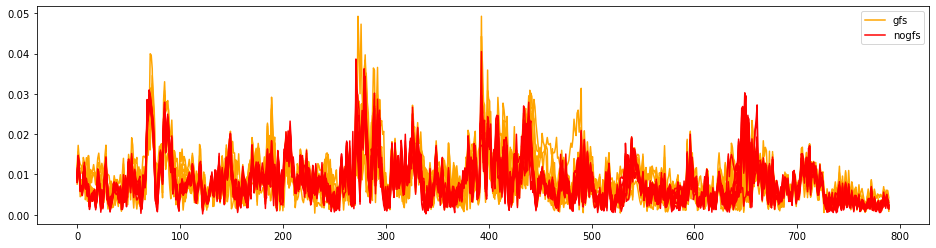

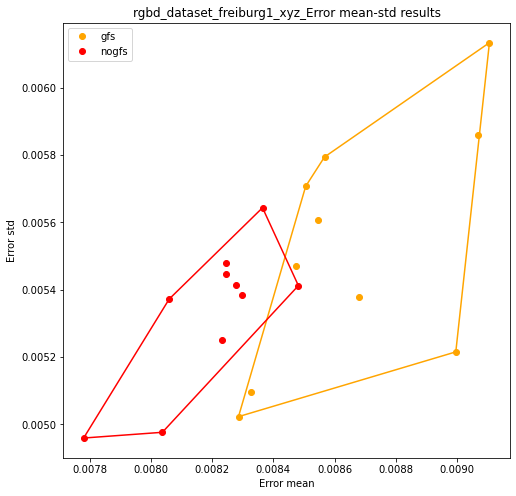

In [37]:
plt.figure(figsize = (16,4))
for key in gfs_name_dict.keys():
    for i,name in enumerate(gfs_name_dict[key]):
        dir_path_full = dataset_chosen_dir + name + '/'
        error_new = np.load(dir_path_full + 'error_array.npy')
        if i == 0:
            plt.plot(error_new,label = key,color = color_dict[key])
        else:
            plt.plot(error_new,color = color_dict[key])
        

        error_mean_list[key] += [np.mean(error_new)]
        error_std_list[key] += [np.std(error_new)]

plt.legend()
plt.show()

plt.figure(figsize = (8,8))
for key in gfs_name_dict.keys():
    plt.plot(error_mean_list[key],error_std_list[key],'o',label = key,color=color_dict[key])
    dataset_name = dataset_head + "_" + dataset_tail

    dataset_chosen_dir = test_path + dataset_name +"/"
    points = (np.array([error_mean_list[key],error_std_list[key]]).T).tolist()
    poly_points = np.array(list(Polygon(points).convex_hull.exterior.coords))
    
    plt.plot(poly_points[:,0],poly_points[:,1],color=color_dict[key])
    olor_dict = {'block10':'r','block30':'cyan','block50':'royalblue'}

plt.xlabel('Error mean')
plt.ylabel('Error std')
plt.title(dataset_name+ '_Error mean-std results')
plt.legend()

plt.savefig('test_pics/'+ dataset_head + "_" + dataset_tail + "_error_std_res_gfs~.jpg")
plt.show()

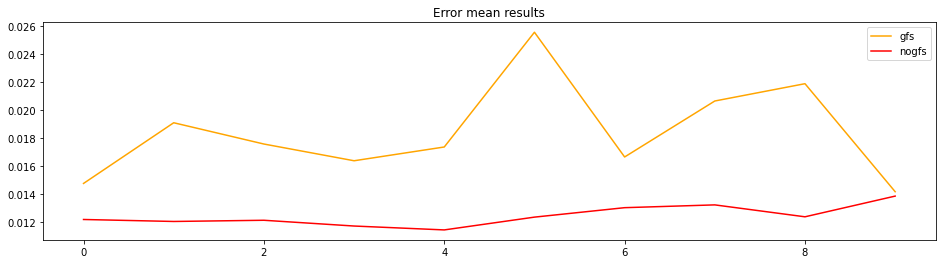

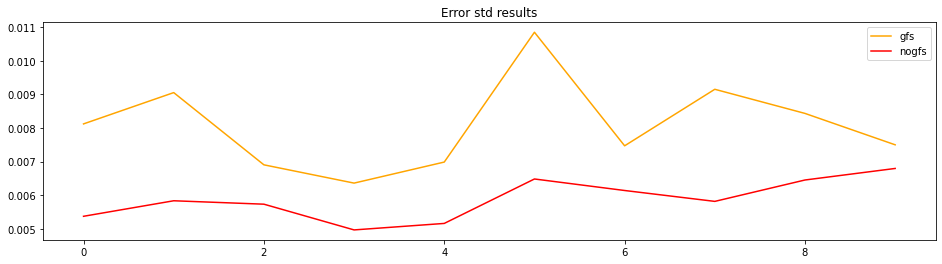

In [478]:
plt.figure(figsize = (16,4))
for key in gfs_name_dict.keys():
    plt.plot(error_mean_list[key],label = key,color=color_dict[key])
plt.title('Error mean results')
plt.legend()
plt.show()

plt.figure(figsize = (16,4))
for key in gfs_name_dict.keys():
    plt.plot(error_std_list[key],label = key,color=color_dict[key])
plt.title('Error std results')
plt.legend()
plt.show()

## MIH test

In [8]:
#Change the dataset name here
dataset_tail = 'room_fast'

dataset_name = dataset_head + "_" + dataset_tail
dataset_name = dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"

In [56]:
#Change the dataset name here
dataset_tail = 'plant'

dataset_name = dataset_head + "_" + dataset_tail
dataset_chosen_dir = test_path + dataset_name +"/"

In [57]:
error_files = os.listdir(dataset_chosen_dir)

error_dirs = sorted([error_dir for error_dir in error_files if "." not in error_dir and 'mih' in error_dir])

In [58]:

multicount_name_dict = {'nomih':[],'mih4':[],'mih8':[],'mih11':[],'mih-11':[],'mih16':[],'mih32':[]}
error_list = copy.deepcopy(multicount_name_dict)
error_mean_list = copy.deepcopy(multicount_name_dict)
error_std_list = copy.deepcopy(multicount_name_dict)

color_dict = {'nomih':'r','mih4':'orange','mih8':'cyan','mih11':'k','mih-11':'darkgrey','mih16':'royalblue','mih32':'violet'}

In [38]:
multicount_name_dict = {'nomih':[],'mih4':[],'mih8':[],'mih16':[],'mih32':[]}
error_list = copy.deepcopy(multicount_name_dict)
error_mean_list = copy.deepcopy(multicount_name_dict)
error_std_list = copy.deepcopy(multicount_name_dict)

color_dict = {'nomih':'r','mih4':'orange','mih8':'cyan','mih11':'k','mih-11':'darkgrey','mih16':'royalblue','mih32':'violet'}

In [59]:
for name in error_dirs:
    multicount_name = name.split('_')[3]
    try:
        multicount_name_dict[multicount_name] += [name]
    except:
        continue

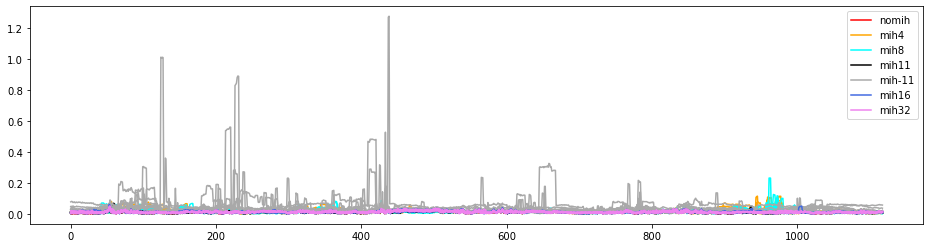

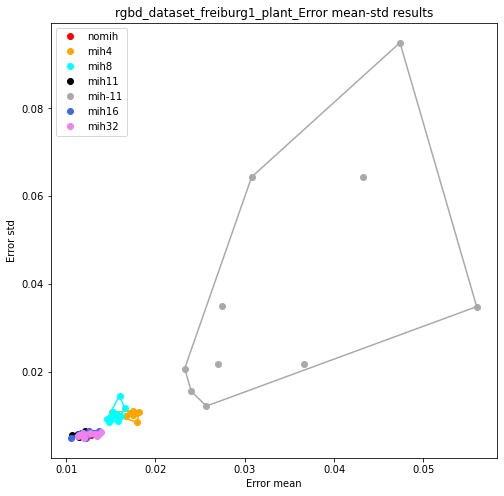

In [60]:
plt.figure(figsize = (16,4))
for key in multicount_name_dict.keys():
    for i,name in enumerate(multicount_name_dict[key]):
        dir_path_full = dataset_chosen_dir + name + '/'
        try:
            error_new = np.load(dir_path_full + 'error_array.npy')
        except:
            continue
        if i == 0:
            plt.plot(error_new,label = key,color = color_dict[key])
        else:
            plt.plot(error_new,color = color_dict[key])
        

        error_mean_list[key] += [np.mean(error_new)]
        error_std_list[key] += [np.std(error_new)]

plt.legend()
plt.show()

# Add test case

plt.figure(figsize = (8,8))
for key in multicount_name_dict.keys():
    if len(error_mean_list[key]) == 0:
        continue
    plt.plot(error_mean_list[key],error_std_list[key],'o',label = key,color=color_dict[key])
    
    points = (np.array([error_mean_list[key],error_std_list[key]]).T).tolist()
    poly_points = np.array(list(Polygon(points).convex_hull.exterior.coords))
    
    plt.plot(poly_points[:,0],poly_points[:,1],color=color_dict[key])
    

plt.xlabel('Error mean')
plt.ylabel('Error std')
plt.title(dataset_name + '_Error mean-std results')
#plt.xlim([0,0.05])
#plt.ylim([0,0.05])
plt.legend()

plt.savefig('test_pics/'+ dataset_name + "_error_std_res_MIH.jpg",dpi=400)
plt.show()

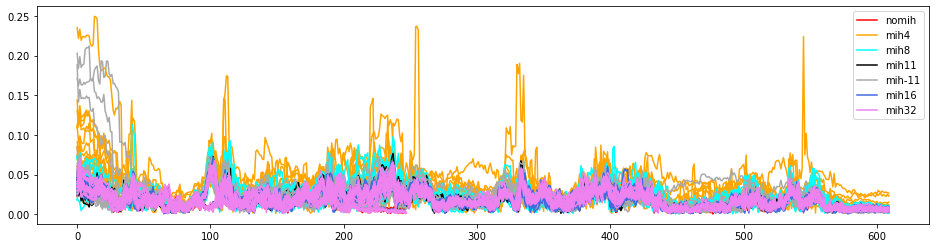

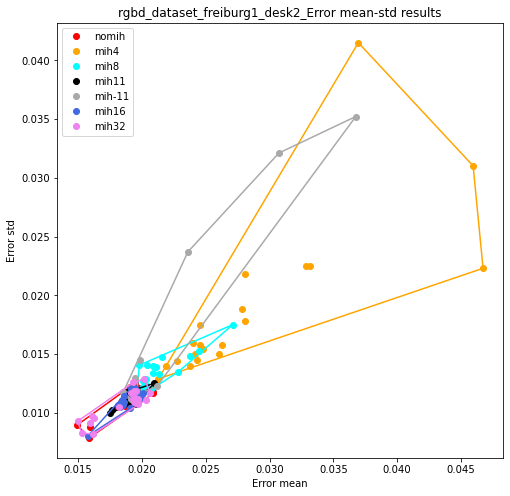

In [578]:
plt.figure(figsize = (16,4))
for key in multicount_name_dict.keys():
    for i,name in enumerate(multicount_name_dict[key]):
        dir_path_full = dataset_chosen_dir + name + '/'
        try:
            error_new = np.load(dir_path_full + 'error_array.npy')
        except:
            continue
        if i == 0:
            plt.plot(error_new,label = key,color = color_dict[key])
        else:
            plt.plot(error_new,color = color_dict[key])
        

        error_mean_list[key] += [np.mean(error_new)]
        error_std_list[key] += [np.std(error_new)]

plt.legend()
plt.show()

# Add test case

plt.figure(figsize = (8,8))
for key in multicount_name_dict.keys():
    if len(error_mean_list[key]) == 0:
        continue
    plt.plot(error_mean_list[key],error_std_list[key],'o',label = key,color=color_dict[key])
    
    points = (np.array([error_mean_list[key],error_std_list[key]]).T).tolist()
    poly_points = np.array(list(Polygon(points).convex_hull.exterior.coords))
    
    plt.plot(poly_points[:,0],poly_points[:,1],color=color_dict[key])
    

plt.xlabel('Error mean')
plt.ylabel('Error std')
plt.title(dataset_name + '_Error mean-std results')
#plt.xlim([0,0.05])
#plt.ylim([0,0.05])
plt.legend()

plt.savefig('test_pics/'+ dataset_name + "_error_std_res_MIH.jpg")
plt.show()

## MIH blocksize test

In [7]:
#Change the dataset name here
dataset_tail = 'desk2'

dataset_name = dataset_head + "_" + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"

In [11]:
error_files = os.listdir(dataset_chosen_dir)

error_dirs = sorted([error_dir for error_dir in error_files if "." not in error_dir and 'block' in error_dir])

In [12]:

multicount_name_dict = {'block10':[],'block30':[],'block50':[]}
error_list = copy.deepcopy(multicount_name_dict)
error_mean_list = copy.deepcopy(multicount_name_dict)
error_std_list = copy.deepcopy(multicount_name_dict)

color_dict = {'block10':'r','block30':'cyan','block50':'royalblue'}

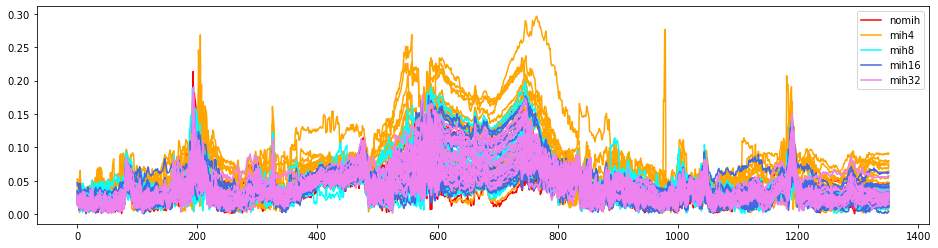

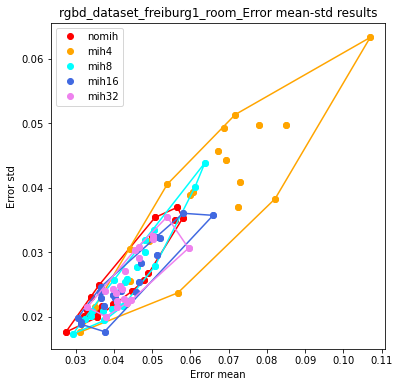

In [800]:
plt.figure(figsize = (16,4))
for key in multicount_name_dict.keys():
    for i,name in enumerate(multicount_name_dict[key]):
        dir_path_full = dataset_chosen_dir + name + '/'
        error_new = np.load(dir_path_full + 'error_array.npy')
        if i == 0:
            plt.plot(error_new,label = key,color = color_dict[key])
        else:
            plt.plot(error_new,color = color_dict[key])
        

        error_mean_list[key] += [np.mean(error_new)]
        error_std_list[key] += [np.std(error_new)]

plt.legend()
plt.show()

plt.figure(figsize = (6,6))
for key in multicount_name_dict.keys():
    plt.plot(error_mean_list[key],error_std_list[key],'o',label = key,color=color_dict[key])
    
    points = (np.array([error_mean_list[key],error_std_list[key]]).T).tolist()
    poly_points = np.array(list(Polygon(points).convex_hull.exterior.coords))
    
    plt.plot(poly_points[:,0],poly_points[:,1],color=color_dict[key])
    

plt.xlabel('Error mean')
plt.ylabel('Error std')
plt.title(dataset_name + '_Error mean-std results')
plt.legend()

#plt.savefig('test_pics/'+ dataset_name + "_error_std_res_MIH.jpg")
plt.show()